<a href="https://colab.research.google.com/github/jerry0810-png/Projects-/blob/main/Quantium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Checking for Outliers in TOT_SALES ---
Normal Range: -1.70 to 15.10
Found 503 outliers!
      LYLTY_CARD_NBR       LIFESTAGE PREMIUM_CUSTOMER  \
1367            4347  YOUNG FAMILIES           Budget   
1464            5063  YOUNG FAMILIES          Premium   
1466            5065  OLDER FAMILIES          Premium   
1635            5235  OLDER FAMILIES          Premium   
2090            7124  OLDER FAMILIES           Budget   

                                     PROD_NAME  PROD_QTY  TOT_SALES  
1367    Smiths Crnkle Chip  Orgnl Big Bag 380g         3       17.7  
1464   Doritos Corn Chips  Cheese Supreme 170g         5       22.0  
1466                  Twisties Cheese     270g         4       18.4  
1635  Old El Paso Salsa   Dip Tomato Mild 300g         3       15.3  
2090                  Twisties Cheese     270g         4       18.4  
Outliers saved to 'Outliers_in_TOT_SALES.csv'


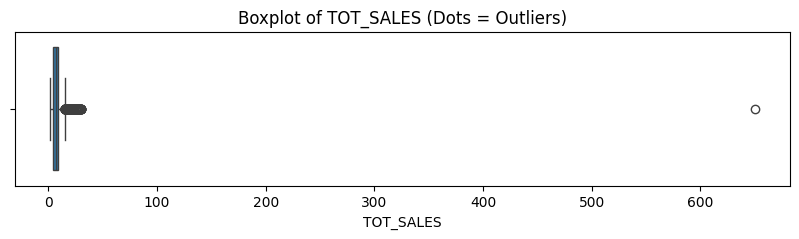

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the CSV file
# Replace 'quantium_cleaned_data.csv' with your actual file name
df = pd.read_csv('quantium_cleaned_data.csv')

# 2. Select the column to check
# Common choices: 'TOT_SALES' or 'PROD_QTY'
col_name = 'TOT_SALES'

print(f"--- Checking for Outliers in {col_name} ---")

# 3. Calculate IQR (Interquartile Range)
Q1 = df[col_name].quantile(0.25)
Q3 = df[col_name].quantile(0.75)
IQR = Q3 - Q1

# Define the "Normal" limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Normal Range: {lower_limit:.2f} to {upper_limit:.2f}")

# 4. Find the Outliers
# Filter for rows that are OUTSIDE the normal limits
outliers = df[(df[col_name] < lower_limit) | (df[col_name] > upper_limit)]

if not outliers.empty:
    print(f"Found {len(outliers)} outliers!")
    print(outliers.head())

    # Save outliers to a new CSV file
    outliers.to_csv(f'Outliers_in_{col_name}.csv', index=False)
    print(f"Outliers saved to 'Outliers_in_{col_name}.csv'")
else:
    print("No outliers found.")

# 5. Visualize with a Boxplot
plt.figure(figsize=(10, 2))
sns.boxplot(x=df[col_name])
plt.title(f'Boxplot of {col_name} (Dots = Outliers)')
plt.show()

# Task
Analyze the 'LIFESTAGE' distribution within the `outliers` DataFrame, visualize this distribution using a bar chart with appropriate labels, and summarize the most prevalent lifestage categories among the outliers.

## Analyze Outlier Lifestage

### Subtask:
Examine the 'outliers' DataFrame and count the occurrences of each 'LIFESTAGE' category among the outliers.


**Reasoning**:
To analyze the distribution of 'LIFESTAGE' among the outliers, I will use the `value_counts()` method on the 'LIFESTAGE' column of the `outliers` DataFrame and store the result in `lifestage_distribution`.



In [2]:
lifestage_distribution = outliers['LIFESTAGE'].value_counts()
print("Lifestage distribution among outliers:")
print(lifestage_distribution)

Lifestage distribution among outliers:
LIFESTAGE
OLDER SINGLES/COUPLES     114
OLDER FAMILIES            104
YOUNG FAMILIES             92
RETIREES                   86
MIDAGE SINGLES/COUPLES     49
YOUNG SINGLES/COUPLES      49
NEW FAMILIES                9
Name: count, dtype: int64


**Reasoning**:
Now that the distribution of lifestages among outliers has been calculated and displayed, the next logical step according to the main task is to visualize this distribution using a bar chart. This will provide a clear visual representation of which lifestages are most prevalent among the identified outliers.



/tmp/ipython-input-3512366693.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lifestage_distribution.index, y=lifestage_distribution.values, palette='viridis')


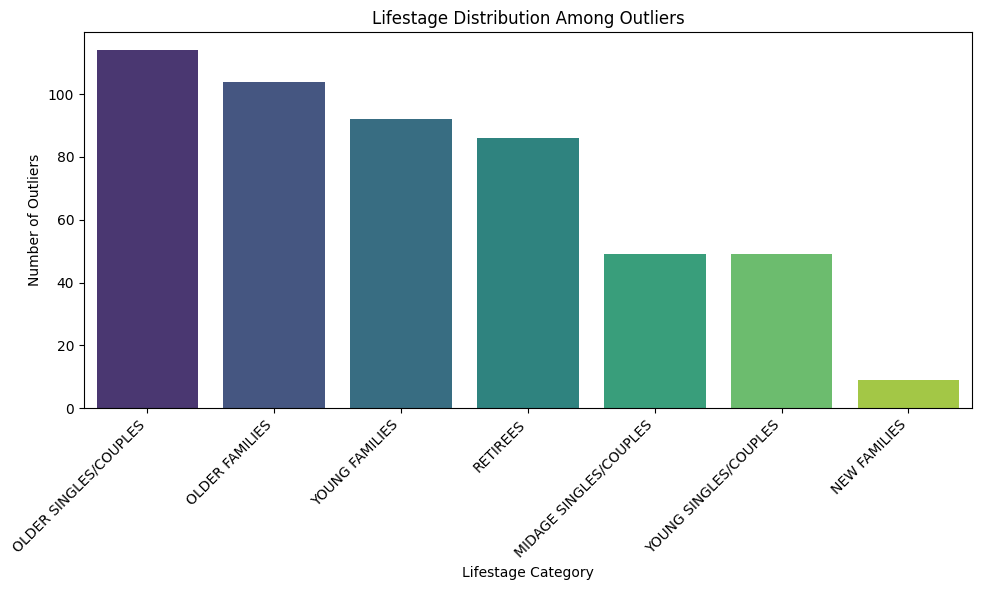

In [4]:
plt.figure(figsize=(10, 6))
sns.barplot(x=lifestage_distribution.index, y=lifestage_distribution.values, palette='viridis')
plt.title('Lifestage Distribution Among Outliers')
plt.xlabel('Lifestage Category')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` because `palette` was used without assigning a `hue` variable in `sns.barplot`. To address this, I will modify the `sns.barplot` call to explicitly set `hue` to the `lifestage_distribution.index` and `legend=False` as suggested by the warning.



In [6]:
import pandas as pd

# Ensure 'df' and 'outliers' DataFrames are available.
# 'df' should be your original DataFrame loaded from 'quantium_cleaned_data.csv'
# 'outliers' should be the DataFrame containing the 503 outliers identified previously.

# To remove the outliers, we can use the index of the outliers DataFrame.
# We want to keep all rows from the original 'df' that are NOT in the 'outliers' DataFrame.

df_cleaned = df.drop(outliers.index)

print(f"Original DataFrame shape: {df.shape}")
print(f"Outliers DataFrame shape: {outliers.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

# Display the first few rows of the cleaned DataFrame
print("\nFirst 5 rows of the cleaned DataFrame:")
display(df_cleaned.head())

# Optionally, save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('quantium_data_cleaned_no_outliers.csv', index=False)
print("\nCleaned data (without outliers) saved to 'quantium_data_cleaned_no_outliers.csv'")

Original DataFrame shape: (72637, 6)
Outliers DataFrame shape: (503, 6)
Cleaned DataFrame shape: (72134, 6)

First 5 rows of the cleaned DataFrame:


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1004,OLDER SINGLES/COUPLES,Mainstream,WW Original Stacked Chips 160g,1,1.9
4,1005,MIDAGE SINGLES/COUPLES,Mainstream,Cheetos Puffs 165g,1,2.8



Cleaned data (without outliers) saved to 'quantium_data_cleaned_no_outliers.csv'


The `df_cleaned` DataFrame now contains your data with the identified outliers removed. You can proceed with further analysis or modeling using this cleaned dataset.

# Task
Summarize the lifestage distribution of the outliers, highlighting the most prevalent lifestage categories.

## Summarize the lifestage distribution of the outliers

### Subtask:
Analyze the calculated lifestage distribution of outliers and identify the most prevalent categories.


### Summary of Lifestage Distribution Among Outliers

The analysis of the `lifestage_distribution` among the identified outliers shows a clear pattern in which customer segments are more prone to exhibiting outlier behavior in total sales. The most prevalent lifestage categories among the outliers are:

1.  **OLDER SINGLES/COUPLES**: This group accounts for the highest number of outliers with **114** instances.
2.  **OLDER FAMILIES**: Following closely, this segment contributed **104** outliers.
3.  **YOUNG FAMILIES**: This group is the third most prevalent with **92** outliers.

Collectively, these three lifestage categories represent a significant majority of the outliers. This suggests that these groups might have higher purchasing patterns or engage in transactions that deviate more significantly from the norm compared to other lifestage segments such as 'NEW FAMILIES', 'MIDAGE SINGLES/COUPLES', or 'YOUNG SINGLES/COUPLES'.

## Summary:

### Data Analysis Key Findings
*   The most prevalent lifestage categories among the identified outliers are 'OLDER SINGLES/COUPLES' with 114 instances, 'OLDER FAMILIES' with 104 instances, and 'YOUNG FAMILIES' with 92 instances.
*   These three categories collectively account for a significant majority of the outliers.

### Insights or Next Steps
*   Further investigation into the purchasing behaviors and transaction patterns of 'OLDER SINGLES/COUPLES', 'OLDER FAMILIES', and 'YOUNG FAMILIES' is recommended to understand the specific reasons for their higher outlier prevalence.
